In [ ]:
import os

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

from IPython.lib.display import isdir
import zipfile
import shutil

# Processing data

This notebook serves as one place for processing images for GANs used in the project. Some datasets are not described (AFD case), they all differ in classes etc. There are two ways of processing and storing ready datasets implemented:
1) without classes, images are shuffled and stored as numpy array
2) both images as numpy array and their classes are stored


Second option allows to later explore conditional GANs.

In [ ]:
# if using google colab and storing data on drive
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


## AFD

Found on Mendeley Animal Faces Dataset, however without proper description.
Link: https://data.mendeley.com/datasets/z3x59pv4bz/3

After exploring images notes:
- quite large dataset (10k samples) with a lot of (19) classes, but not so diverse
- quality is low (66x66)  
- face position not perfect, some angles

In [ ]:
!unzip /content/gdrive/MyDrive/ganimals/afd.zip

Archive:  /content/gdrive/MyDrive/ganimals/afd.zip
   creating: AFDя╝ИAnimal Face Dataset)/
   creating: AFDя╝ИAnimal Face Dataset)/face images/
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Macaca fascicularis.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Pan troglodytes.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Nomascus leucogenys.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Panthera leo.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Papio anubis.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Cercopithecus neglectus.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Saimiri sciureus.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Cebus apella.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Ailurus fulgens.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Panthera tigris.zip  
  inflating: AFDя╝ИAnimal Face Dataset)/face images/Mandrillus sphinx.zip  
  inflating: AFDя╝ИAnimal Face 

In [ ]:
!mv AFDя╝ИAnimal\ Face\ Dataset\)/face\ images/ /content/afd/

In [ ]:
# get the structure of the data
path = '/content/afd/'
os.listdir(path)

['Nomascus leucogenys.zip',
 'Lemur catta.zip',
 'Trachypithecus francoisi.zip',
 'Cebus apella.zip',
 'Macaca fascicularis.zip',
 'Chlorocebus sabaeus.zip',
 'Night-vision Rhinopithecus.zip',
 'Panthera tigris.zip',
 'Macaca thibetana.zip',
 'Panthera leo.zip',
 'Ailurus fulgens.zip',
 'mongooses.zip',
 'Papio anubis.zip',
 'Mandrillus sphinx.zip',
 'Erythrocebus patas.zip',
 'Saimiri sciureus.zip',
 'Cebus olivaceus.zip',
 'Pan troglodytes.zip',
 'Cercopithecus nictitans.zip',
 'Cercopithecus neglectus.zip',
 'Macaca mulatta.zip']

The subfolders with images are zipped as well. Below let's extract them and deleted zipped folders, leaving only directories with images.

In [ ]:
os.chdir(path)

def extract_zips(delete_zip=True):

  for file in os.listdir('.'):
    if os.path.isfile(path + file):
      print(path, file)
      with zipfile.ZipFile(file, 'r') as zip_ref:
        
        zip_ref.extractall('.')
        
    if delete_zip: os.remove(file)

extract_zips()

/content/afd/ Nomascus leucogenys.zip
/content/afd/ Lemur catta.zip
/content/afd/ Trachypithecus francoisi.zip
/content/afd/ Cebus apella.zip
/content/afd/ Macaca fascicularis.zip
/content/afd/ Chlorocebus sabaeus.zip
/content/afd/ Night-vision Rhinopithecus.zip
/content/afd/ Panthera tigris.zip
/content/afd/ Macaca thibetana.zip
/content/afd/ Panthera leo.zip
/content/afd/ Ailurus fulgens.zip
/content/afd/ mongooses.zip
/content/afd/ Papio anubis.zip
/content/afd/ Mandrillus sphinx.zip
/content/afd/ Erythrocebus patas.zip
/content/afd/ Saimiri sciureus.zip
/content/afd/ Cebus olivaceus.zip
/content/afd/ Pan troglodytes.zip
/content/afd/ Cercopithecus nictitans.zip
/content/afd/ Cercopithecus neglectus.zip
/content/afd/ Macaca mulatta.zip


In [ ]:
os.listdir(path)

['__MACOSX',
 'mongooses',
 'Mandrillus sphinx',
 'Papio anubis',
 'Cebus olivaceus',
 'Panthera leo',
 'Cebus apella',
 'Nomascus leucogenys',
 'σñ£Φºåσ¢╛σâÅ',
 'Ailurus fulgens',
 'Trachypithecus francoisi',
 'Chlorocebus sabaeus',
 'Cercopithecus neglectus',
 'Panthera tigris',
 'Cercopithecus nictitans',
 'Lemur catta',
 'Macaca mulatta',
 'Pan troglodytes',
 'Macaca thibetana',
 'ΘúƒΦƒ╣τî┤Φúüσë¬',
 'Saimiri sciureus',
 'Erythrocebus patas']

There are some weirdly named directiories. Let's delete them.

In [ ]:
def remove_weird_dirs(path, weird_ones):

  for dir in os.listdir(path):
    if  dir in weird_ones:
      shutil.rmtree(path + dir)


remove_weird_dirs(path, ['σñ£Φºåσ¢╛σâÅ', 'ΘúƒΦƒ╣τî┤Φúüσë¬', '__MACOSX'])

The whole directory has quite complicated structure with many subdirectories. Before handling that, let's see example image and extract classes.

Image shape: (66, 66, 3)


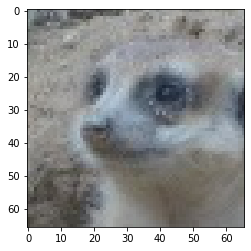

In [ ]:
filename = '/content/afd/mongooses/ver/1/000000-1.jpg'
image = Image.open(filename)
pixels = np.array(image)

print(f'Image shape: {pixels.shape}')

plt.imshow(pixels)

Images are of original 66x66 size. In order to stay consistent with GAN architecture for 80x80 images, we will resize it anyway.

Now let's provide class dictionary for mapping when we want to store targets of images as well.

In [ ]:
classes = os.listdir(path)
class_dict = {classes[i] : i for i in range(len(classes))}

# TEST CLASS DICT
def test_class_dict(class_dict, expected_nclasses):
  assert type(class_dict.values()[0]) == int # check the type
  assert len(class_dict) == expected_nclasses # check n classes

test_class_dict(class_dict, 19)

class_dict

{'mongooses': 0,
 'Mandrillus sphinx': 1,
 'Papio anubis': 2,
 'Cebus olivaceus': 3,
 'Panthera leo': 4,
 'Cebus apella': 5,
 'Nomascus leucogenys': 6,
 'Ailurus fulgens': 7,
 'Trachypithecus francoisi': 8,
 'Chlorocebus sabaeus': 9,
 'Cercopithecus neglectus': 10,
 'Panthera tigris': 11,
 'Cercopithecus nictitans': 12,
 'Lemur catta': 13,
 'Macaca mulatta': 14,
 'Pan troglodytes': 15,
 'Macaca thibetana': 16,
 'Saimiri sciureus': 17,
 'Erythrocebus patas': 18}

In [ ]:
# load an image as an rgb numpy array, resize 
def load_image(filename, required_size=(80, 80)):
  '''
  Load particular image, resize and convert to RBG channels and return it as array.

  Args:
  filename - str, path to a file with file name
  required_size - tuple, (width, height) of desired size that image should be resized to

  '''
  image = Image.open(filename)
  image = image.convert('RGB')
  image = image.resize(required_size)
  pixels = np.array(image)
 
  return pixels
  
def load_all_images_afd(directory, with_targets=False, class_dict=None):
  '''
  Iterate over directories in main directory and read all images to one array.

  Args:
  directory - str, main directory with files

  '''
  images = []
  targets = []
  
  for dir in os.listdir(directory):
    for dir_internal_first in os.listdir(directory + dir):
      for dir_internal_second in os.listdir(directory + dir + '/' + dir_internal_first):
        for filename in os.listdir(directory + dir + '/' + dir_internal_first + '/' + dir_internal_second):

          whole_path = directory + '/' + dir + '/' + dir_internal_first + '/' + dir_internal_second + '/'  + filename

          if os.path.isfile(whole_path):
            pixels = load_image(whole_path)
            images.append(pixels)

            if with_targets: 
              if class_dict is None: 
                raise Exception("Class dictionary mapping from class label to int is missing. Please provide class_dict argument.")
              else:
                targets.append(class_dict[dir])

  return np.array(images), np.array(targets)

In [ ]:
afd_animals, afd_targets = load_all_images_afd('/content/afd/', with_targets=True, class_dict=class_dict)

Below I define some simple test to use thoughout images processing

In [ ]:
# TEST IMAGES AND CLASSES LOADING
def test_loading_images(images, classes, expected_nclasses): 
  assert classes.shape[0] == images.shape[0] # check that there are same number of samples in target and animal arrs
  assert images.shape[1:] == (80, 80, 3)
  assert len(np.unique(classes)) == expected_nclasses

In [ ]:
test_loading_images(afd_animals, afd_targets, 19)

print(f"Number of images: {afd_targets.shape[0]}")
print(f"Images of shape: {afd_animals.shape[1:]}")
print(f"Number of classes: {len(np.unique(afd_targets))}")

Number of images: 10576
Images of shape: (80, 80, 3)
Number of classes: 19


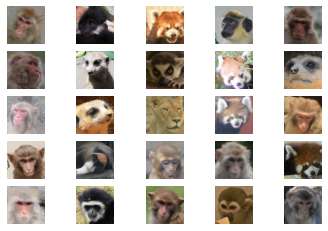

In [ ]:
def plot_animals(images, n):

	for i in range(n * n):
		plt.subplot(n, n, 1 + i)
		
		plt.axis('off') # turn off axis
		plt.imshow(images[i])
  
	plt.show()

 
plot_animals(np.random.permutation(afd_animals), 5) # permute in order to display different animals, they are sorted by species

Save processed images to numpy compressed format for fast and easy access later. Note that they are already resized but not directly processed for GANs.

In [ ]:
np.savez_compressed('/content/gdrive/MyDrive/ganimals/afd_class_dict.npz', class_dict_afd)

np.savez_compressed('/content/gdrive/MyDrive/ganimals/afd_animals.npz', afd_animals) 
np.savez_compressed('/content/gdrive/MyDrive/ganimals/afd_targets.npz', afd_targets) 

# AFHQ

AFHQ dataset contains images of cats, dogs and wildlife (lions, tigers) focused on their faces.

Link to data readme: https://github.com/clovaai/stargan-v2/blob/master/README.md#animal-faces-hq-dataset-afhq

After exploring dataset notes:
- really high quality images (512x512)
- large amount of images (15k) but only 3 classes
- nicely positioned on face

In [ ]:
os.chdir('/content/')

In [ ]:
! unzip /content/gdrive/MyDrive/ganimals/afhq_v2.zip

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: train/dog/pixabay_dog_003615.png  
  inflating: train/dog/pixabay_dog_003616.png  
  inflating: train/dog/pixabay_dog_003617.png  
  inflating: train/dog/pixabay_dog_003618.png  
  inflating: train/dog/pixabay_dog_003619.png  
  inflating: train/dog/pixabay_dog_003620.png  
  inflating: train/dog/pixabay_dog_003621.png  
  inflating: train/dog/pixabay_dog_003622.png  
  inflating: train/dog/pixabay_dog_003623.png  
  inflating: train/dog/pixabay_dog_003624.png  
  inflating: train/dog/pixabay_dog_003625.png  
  inflating: train/dog/pixabay_dog_003626.png  
  inflating: train/dog/pixabay_dog_003627.png  
  inflating: train/dog/pixabay_dog_003628.png  
  inflating: train/dog/pixabay_dog_003629.png  
  inflating: train/dog/pixabay_dog_003630.png  
  inflating: train/dog/pixabay_dog_003631.png  
  inflating: train/dog/pixabay_dog_003632.png  
  inflating: train/dog/pixabay_dog_003633.png  
  inflating: train/dog/

Data is already separated for train and test and was extracted to respective directories called that way.

Image shape: (512, 512, 3)


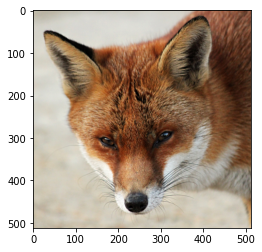

In [ ]:
filename = '/content/test/wild/flickr_wild_000004.png'
image = Image.open(filename)
pixels = np.array(image)

print(f'Image shape: {pixels.shape}')

plt.imshow(pixels)

In [ ]:
classes = os.listdir('/content/test')
class_dict_afhq = {classes[i] : i for i in range(len(classes))}

# TEST
test_class_dict(class_dict_afhq, 3)

class_dict_afhq

{'dog': 0, 'wild': 1, 'cat': 2}

In [ ]:
def load_all_images(directory, with_target=False, class_dict=None, required_size=(80, 80)):
  images = []
  targets = []

  for dir in os.listdir(directory):
    for filename in os.listdir(directory + dir):
      pixels = load_image(directory + '/' + dir + '/' + filename, required_size=required_size)
      images.append(pixels)

      if with_target:
        if class_dict is None:
          raise Exception("Class dictionary mapping from class label to int is missing. Please provide class_dict argument.")
        else:
          targets.append(class_dict[dir])

  return np.array(images), np.array(targets)

In [ ]:
# load the data
afhq_test, afhq_test_targets = load_all_images('test/', with_target=True, class_dict=class_dict_afhq)
afhq_train, afhq_train_targets = load_all_images('train/', with_target=True, class_dict=class_dict_afhq)

In [ ]:
afhq_animals = np.concatenate([afhq_train, afhq_test])
afhq_targets = np.concatenate([afhq_train_targets, afhq_test_targets])

In [ ]:
# TEST
test_loading_images(afhq_animals, afhq_targets, 3)

print(f"Number of images: {afhq_targets.shape[0]}")
print(f"Images of shape: {afhq_animals.shape[1:]}")
print(f"Number of classes: {len(np.unique(afhq_targets))}")

Number of images: 15803
Images of shape: (80, 80, 3)
Number of classes: 3


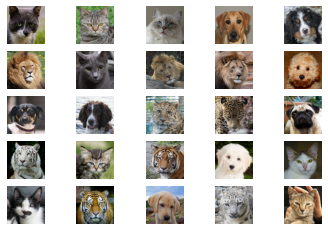

In [ ]:
plot_animals(np.random.permutation(afhq_animals), 5) # permute in order to display different animals, they are sorted by species

In [ ]:
np.savez_compressed('/content/gdrive/MyDrive/ganimals/afhq_class_dict.npz', class_dict_afhq)

np.savez_compressed('/content/gdrive/MyDrive/ganimals/afhq_animals.npz', afhq_animals) 
np.savez_compressed('/content/gdrive/MyDrive/ganimals/afhq_targets.npz', afhq_targets) 

In [ ]:
# save bigger images 128x128 for potential use in BigGAN (operating on big images)
afhq_test128, afhq_test_targets128 = load_all_images('test/', with_target=True, class_dict=class_dict_afhq, required_size=(128, 128))
afhq_train128, afhq_train_targets128 = load_all_images('train/', with_target=True, class_dict=class_dict_afhq, required_size=(128, 128))

afhq_animals128 = np.concatenate([afhq_train128, afhq_test128])
afhq_targets128 = np.concatenate([afhq_train_targets128, afhq_test_targets128])

np.savez_compressed('/content/gdrive/MyDrive/ganimals/afhq_animals128.npz', afhq_animals128) 
np.savez_compressed('/content/gdrive/MyDrive/ganimals/afhq_targets128.npz', afhq_targets128) 

# LHI

Honestly found this data rather randomly here https://vcla.stat.ucla.edu/people/zhangzhang-si/HiT/exp5.html, however, the link to the dataset from the page directly downloads it. Therefore I don't know how big it is and what the origin of it is.


After exploring notes:
- small dataset (2k) with a lot of diverse (!) classes (19)
- images are quite of medium quality (150x150)
- position on faced nicely

In [ ]:
! unzip /content/gdrive/MyDrive/ganimals/lhi_animal_face.zip

Archive:  /content/gdrive/MyDrive/ganimals/lhi_animal_face.zip
  inflating: Image/DuckHead/duckside0053.jpg  
  inflating: Image/DuckHead/duckside0072.jpg  
  inflating: Image/DuckHead/duckside0087.jpg  
  inflating: Image/DuckHead/duckside0088.jpg  
  inflating: Image/DuckHead/duckside0051.jpg  
  inflating: Image/DuckHead/duck-02.jpg  
  inflating: Image/DuckHead/duckside0075.jpg  
  inflating: Image/DuckHead/Knobbilled Duck 268010.jpg  
  inflating: Image/DuckHead/duckside0096.jpg  
  inflating: Image/DuckHead/duckside0074.jpg  
  inflating: Image/DuckHead/duckside0100.jpg  
  inflating: Image/DuckHead/duckside0011.jpg  
  inflating: Image/DuckHead/duckside0013.jpg  
  inflating: Image/DuckHead/duckside0045.jpg  
  inflating: Image/DuckHead/duckside0030.jpg  
  inflating: Image/DuckHead/duckside0077.jpg  
  inflating: Image/DuckHead/duckside0067.jpg  
  inflating: Image/DuckHead/duckside0014.jpg  
  inflating: Image/DuckHead/duckside0063.jpg  
  inflating: Image/DuckHead/duckside004

In [ ]:
# get the structure of the data
lhi_path = '/content/Image/'
os.listdir(lhi_path)

['BearHead',
 'MouseHead',
 'CatHead',
 'CowHead',
 'PigeonHead',
 'DuckHead',
 'ChickenHead',
 'PandaHead',
 'ElephantHead',
 'DeerHead',
 'RabbitHead',
 'MonkeyHead',
 'WolfHead',
 'LionHead',
 'Natural',
 'DogHead',
 'TigerHead',
 'SheepHead',
 'EagleHead',
 'HumanHead',
 'PigHead']

Image shape: (150, 150, 3)


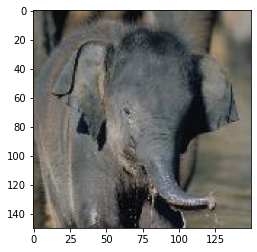

In [ ]:
image = Image.open(lhi_path + 'ElephantHead/0000000005.jpg')
pixels = np.array(image)

print(f"Image shape: {pixels.shape}")

# visualize random pic
plt.imshow(pixels)
plt.show()

We don't want to include Human Head as well as landscapes 'Natural'. Removing those directories.

In [ ]:
remove_weird_dirs(lhi_path, ['HumanHead', 'Natural'])

In [ ]:
classes = os.listdir('/content/Image/')
class_dict_lhi = {classes[i] : i for i in range(len(classes))}

# TEST
test_class_dict(class_dict_lhi, 19)

class_dict_lhi

{'BearHead': 0,
 'MouseHead': 1,
 'CatHead': 2,
 'CowHead': 3,
 'PigeonHead': 4,
 'DuckHead': 5,
 'ChickenHead': 6,
 'PandaHead': 7,
 'ElephantHead': 8,
 'DeerHead': 9,
 'RabbitHead': 10,
 'MonkeyHead': 11,
 'WolfHead': 12,
 'LionHead': 13,
 'DogHead': 14,
 'TigerHead': 15,
 'SheepHead': 16,
 'EagleHead': 17,
 'PigHead': 18}

In [ ]:
lhi_animals, lhi_targets = load_all_images('/content/Image/', with_target=True, class_dict=class_dict_lhi)

In [ ]:
# TEST
test_loading_images(lhi_animals, lhi_targets, 19)

print(f"Number of images: {lhi_targets.shape[0]}")
print(f"Images of shape: {lhi_animals.shape[1:]}")
print(f"Number of classes: {len(np.unique(lhi_targets))}")

Number of images: 2312
Images of shape: (80, 80, 3)
Number of classes: 19


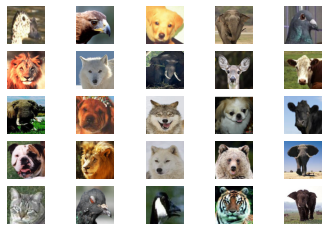

In [ ]:
plot_animals(np.random.permutation(lhi_animals), 5) # permute in order to display different animals, they are sorted by species

In [ ]:
np.savez_compressed('/content/gdrive/MyDrive/ganimals/lhi_class_dict.npz', class_dict_lhi)

np.savez_compressed('/content/gdrive/MyDrive/ganimals/lhi_animals.npz', lhi_animals) 
np.savez_compressed('/content/gdrive/MyDrive/ganimals/lhi_targets.npz', lhi_targets) 